# A1, A2, A3 Visualise evaluation results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

PALETTE = (
    'lightgreen', '#ffdbfd', 'lightpink', 'lightblue',
    'lightcyan', '#66b3ff', '#d4ff01', '#fdafff')

def draw_bar_chart(data, title, optimal_value, x, y, text_pos=(0.05, -0.01), y_label='Score', colors = PALETTE):
    df = pd.DataFrame(data)
    ax = df.set_index(x).plot(kind='bar', stacked=False, y=y, figsize=(8, 6), color=colors)
    ax.axhline(y=optimal_value, color='red', linestyle='--', linewidth=3)
    ax.text(text_pos[0], text_pos[1], 'Optimal Value', color='red', fontsize=12)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

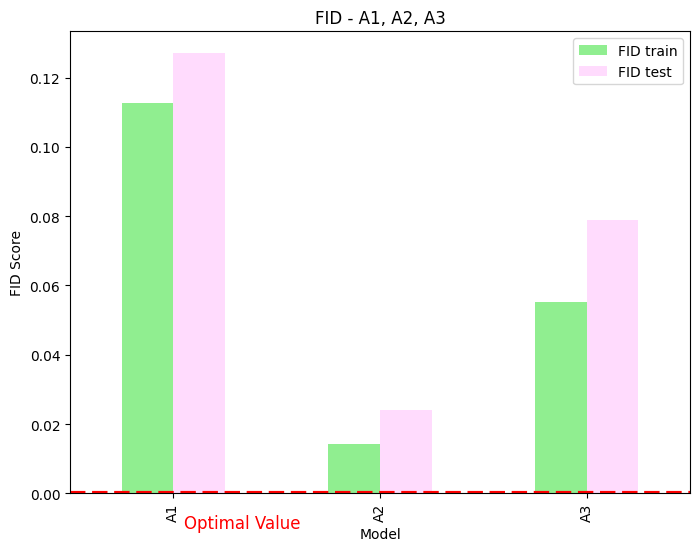

In [2]:
# A1, A2, A3 - FID
fid_data = {
    'Model': ['A1','A2', 'A3'],
    'FID test': [0.1270, 0.0242, 0.0789],
    'FID train': [0.1128, 0.0143, 0.0551]
}
    
draw_bar_chart(fid_data, 'FID - A1, A2, A3', 0.0, ['Model'], ['FID train', 'FID test'], y_label="FID Score")


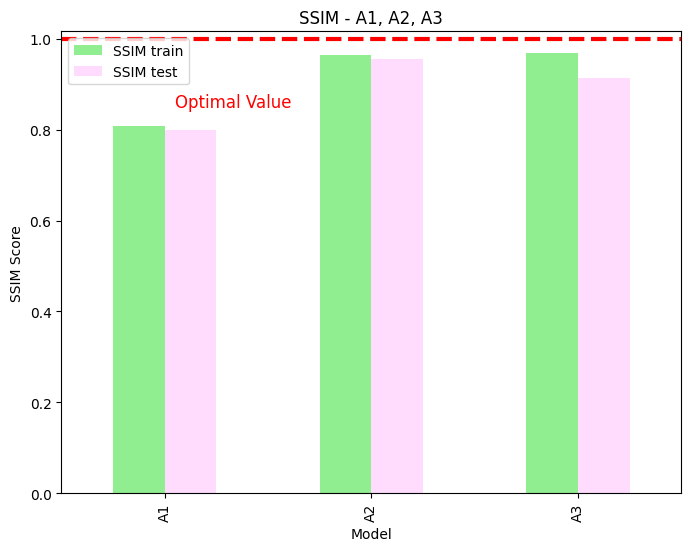

In [3]:
# A1, A2, A3 - SSIM


ssim_data = {
    'Model': ['A1','A2', 'A3'],
    'SSIM test': [0.7997, 0.9543, 0.9137],
    'SSIM train': [0.8071, 0.9636, 0.9676]
}
    
draw_bar_chart(ssim_data, 'SSIM - A1, A2, A3', 1.0, ['Model'], ['SSIM train', 'SSIM test'], text_pos=(0.05, 0.85), y_label="SSIM Score")

# B, C, D Visualise evaluation results

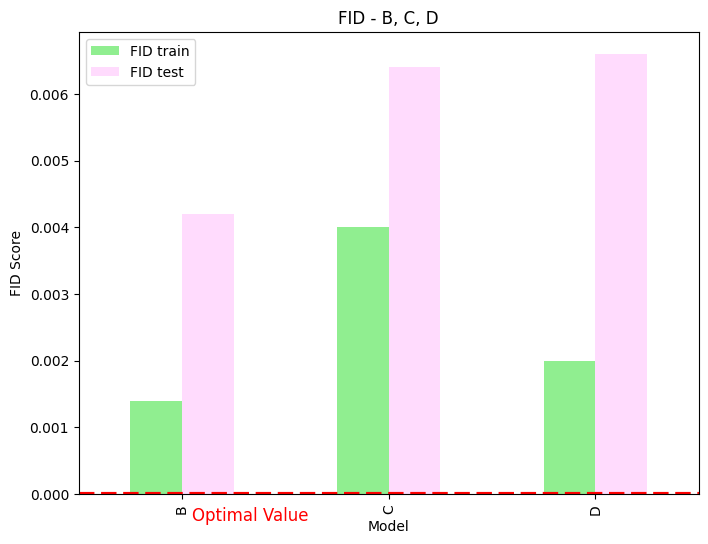

In [4]:
fid_data = {
    'Model': ['B','C', 'D'],
    'FID test': [0.0042, 0.0064, 0.0066],
    'FID train': [0.0014, 0.0040, 0.0020]
}

draw_bar_chart(fid_data, 'FID - B, C, D', 0.0, ['Model'], ['FID train', 'FID test'], y_label="FID Score", text_pos=(0.05, -0.0004))

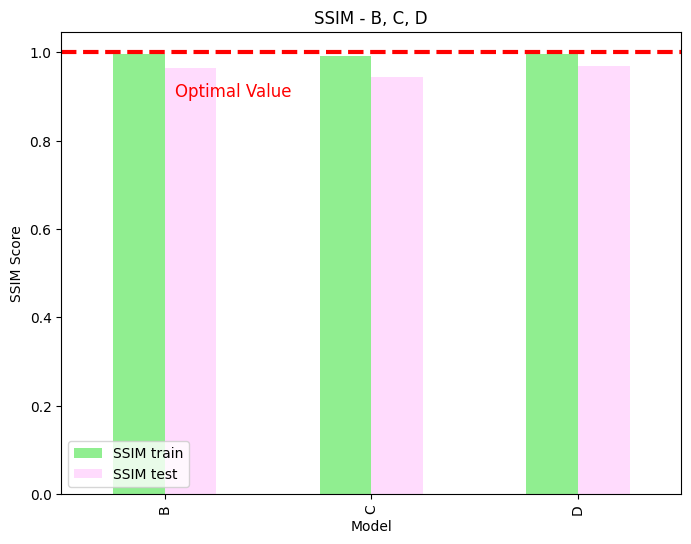

In [5]:
ssim_data = {
    'Model': ['B','C', 'D'],
    'SSIM test': [0.9649, 0.9448, 0.9695],
    'SSIM train': [0.9961, 0.9928, 0.9965]
}

draw_bar_chart(ssim_data, 'SSIM - B, C, D', 1.0, ['Model'], ['SSIM train', 'SSIM test'], text_pos=(0.05, 0.90), y_label="SSIM Score")

# E1 vs E2 - Visualise evaluation results

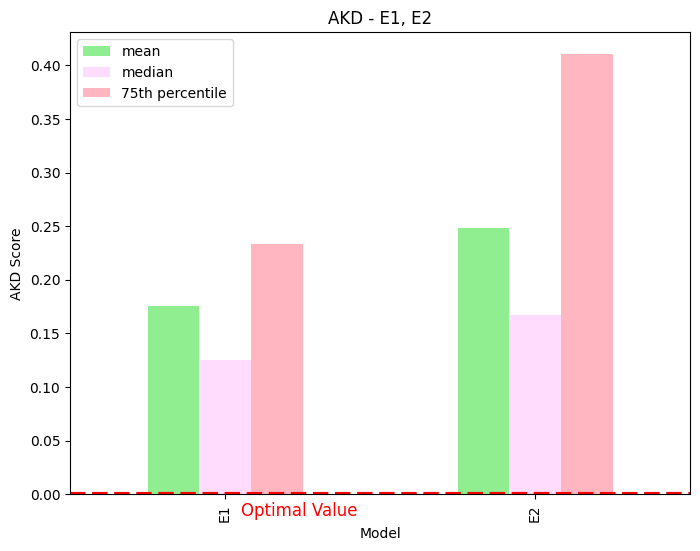

In [6]:
akd_data = {
    'Model': ['E1','E2'],
    'mean': [0.17540207068382943, 0.24830762094062975],
    'median': [0.12491664799310974, 0.16701937374671244],
    '75th percentile': [0.23379222884401288, 0.4105130858972018],
}

draw_bar_chart(akd_data, 'AKD - E1, E2', 0.0, ['Model'], ['mean', 'median', '75th percentile'], y_label="AKD Score", text_pos=(0.05, -0.02))

# Qualitative Analysis

In [7]:
df = pd.read_csv("./MMPIXAGEN - Image quality analysis.csv")
df.columns

Index(['Timestamp', 'Character 1 B1 Quality', 'Character 1 C1 Quality',
       'Character 1 D1 Quality', 'Character 1 E1 Quality',
       'Character 1 E2 Quality', 'Character 2 B1 Quality',
       'Character 2 C1 Quality', 'Character 2 D1 Quality',
       'Character 2 E1 Quality', 'Character 2 E2 Quality',
       'Character 3 B1 Quality', 'Character 3 C1 Quality',
       'Character 3 D1 Quality', 'Character 3 E1 Quality',
       'Character 3 E2 Quality', 'Character 4 B1 Quality',
       'Character 4 C1 Quality', 'Character 4 D1 Quality',
       'Character 4 E1 Quality', 'Character 4 E2 Quality',
       'Character 5 B1 Quality', 'Character 5 C1 Quality',
       'Character 5 D1 Quality', 'Character 5 E1 Quality',
       'Character 5 E2 Quality'],
      dtype='object')

In [8]:
import numpy as np
from collections import defaultdict

characters = [str(x) for x in range(1, 6)]
models = ['B1', 'C1', 'D1', 'E1', 'E2']

qualitative_data = {
    "Model": models,
}



avg = defaultdict(list)

for character in characters:
    data = []
    for model in models:
        column = f"Character {character} {model} Quality"
        data.append(float(df[column].mean()))
        avg[model].append(float(df[column].mean()))
    qualitative_data[f"Character {character}"] = data

qualitative_data_all = {
    "Model": models,
    "Quality": [float(np.array(avg[model]).mean()) for model in models],
}

qualitative_data, qualitative_data_all


({'Model': ['B1', 'C1', 'D1', 'E1', 'E2'],
  'Character 1': [3.857142857142857,
   3.5714285714285716,
   3.7142857142857144,
   1.5714285714285714,
   4.142857142857143],
  'Character 2': [3.5714285714285716,
   3.857142857142857,
   3.7142857142857144,
   1.4285714285714286,
   4.428571428571429],
  'Character 3': [3.142857142857143,
   3.0,
   3.0,
   1.4285714285714286,
   3.4285714285714284],
  'Character 4': [2.857142857142857,
   2.857142857142857,
   2.857142857142857,
   1.1428571428571428,
   3.0],
  'Character 5': [3.142857142857143,
   3.0,
   3.142857142857143,
   1.1428571428571428,
   3.0]},
 {'Model': ['B1', 'C1', 'D1', 'E1', 'E2'],
  'Quality': [3.3142857142857145,
   3.257142857142857,
   3.285714285714286,
   1.3428571428571427,
   3.6]})

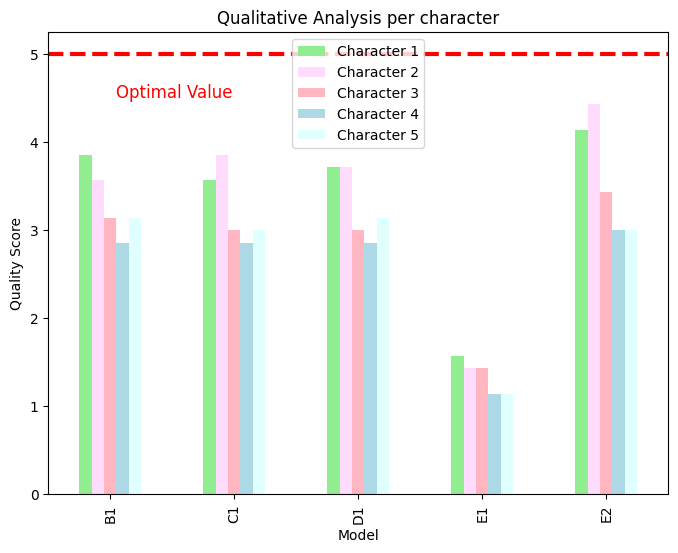

In [9]:
draw_bar_chart(qualitative_data, 'Qualitative Analysis per character', 5.0, ['Model'], [f"Character {x}" for x in characters], text_pos=(0.05, 4.5), y_label="Quality Score")

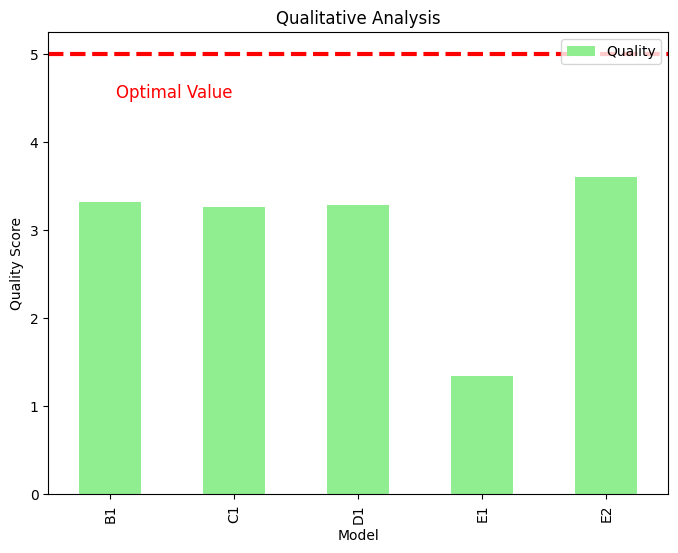

In [10]:
draw_bar_chart(qualitative_data_all, 'Qualitative Analysis', 5.0, ['Model'], ['Quality'], text_pos=(0.05, 4.5), y_label="Quality Score")